In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model 

In [2]:
data = pd.read_csv('homeprices.csv')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
data.bedrooms = data.bedrooms.fillna(data.bedrooms.median()) # filling blank value with median of column
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
reg = linear_model.LinearRegression()
reg.fit(data.drop('price',axis='columns'),data.price)
reg

LinearRegression()

In [5]:
print(reg.coef_)
print(reg.intercept_)

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540408


In [6]:
reg.predict([[3000,3,40]])
reg.predict([[2500,4,5]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

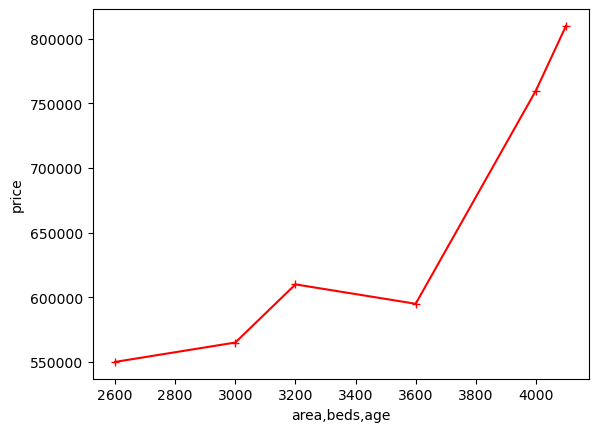

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('area,beds,age')
plt.ylabel('price')
plt.plot(data.area, data.price,color='red',marker='+')
# plt.plot(data.bedrooms, data.price,color='blue',marker='+')
# plt.plot(data.age, data.price,color='black',marker='+')

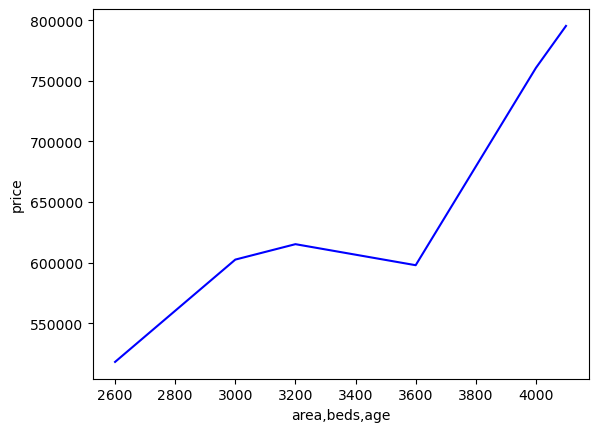

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('area,beds,age')
plt.ylabel('price')
plt.plot(data.area,reg.predict(data[['area','bedrooms','age']]),color='blue')